# Import Libraries

### Pandas
### Seaborn
### Matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read Dataset File

In [2]:
dataset=pd.read_csv(r"C:\Users\zabiz\Downloads\Data_Science\Task4/Advertising.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
dataset = dataset.iloc[:, 1:]


### Check The Coo-Relation Between the Variable

In [4]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Check Null Values

In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Check The Relationship between The variables Grapically

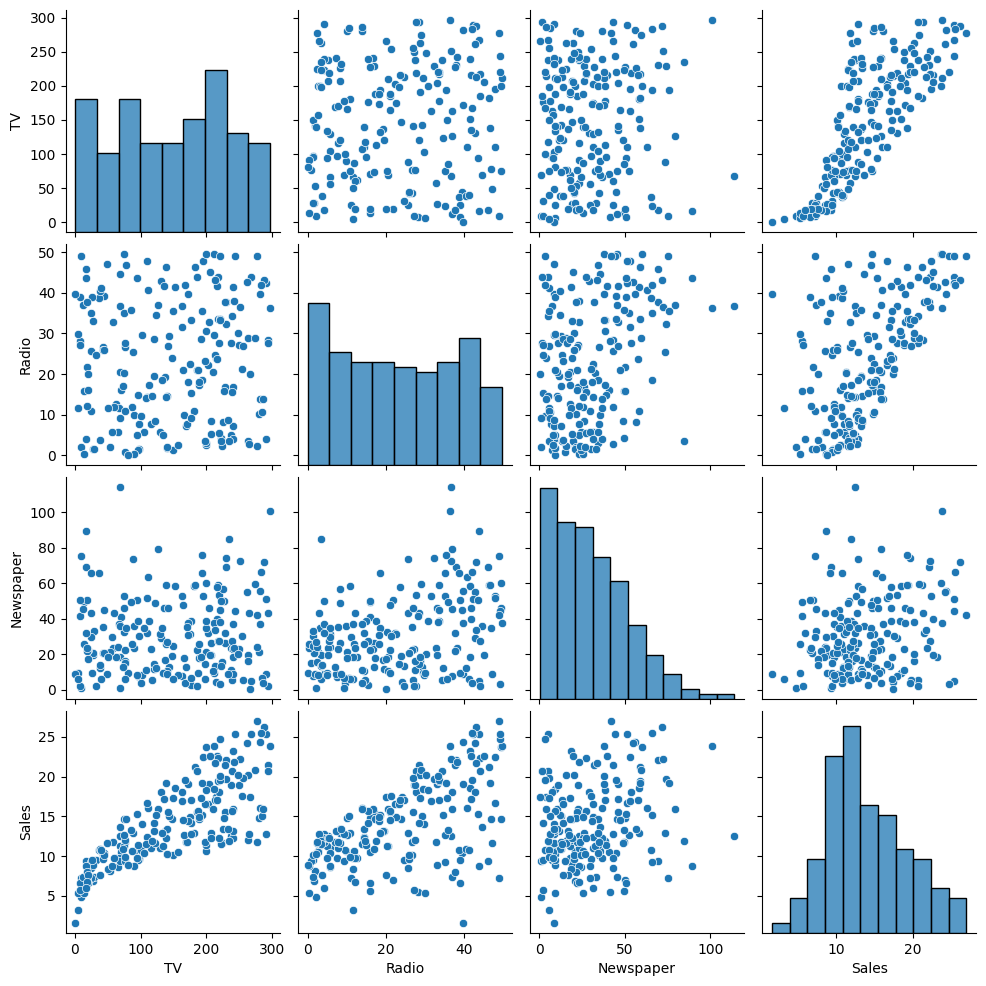

In [6]:
sns.pairplot(data=dataset)
plt.show()

### Split the data in X & Y variable Dependent or Independent Variable

In [7]:
x=dataset.iloc[:,:-1]
y=dataset["Sales"]

### Model Selection for spliting the data in test or train

In [8]:
from sklearn.model_selection import train_test_split

### Split the data in train and test

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.4, random_state=14)

### Select the Machine Learning Model ( Random Forest Regressor)

In [10]:
from sklearn.ensemble import RandomForestRegressor

### Fit the Model / Apply The Model

In [11]:
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
rg

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Check the score (accuacry) of the Model for checking the overfitting of our model (but model is not overfit)

In [12]:
rg.score(x_test,y_test)*100,rg.score(x_train,y_train)*100

(97.10043280254222, 99.53645372251094)

### Predict The value

In [26]:
dataset["Prediction"] =rg.predict(x)
dataset.head()

,TV,Radio,Newspaper,Sales,Prediction
0,230.1,37.8,69.2,22.1,22.238
1,44.5,39.3,45.1,10.4,10.506
2,17.2,45.9,69.3,9.3,8.515
3,151.5,41.3,58.5,18.5,18.022
4,180.8,10.8,58.4,12.9,13.734


### Check The Model Performance Through The Graph (Actual VS Sales)

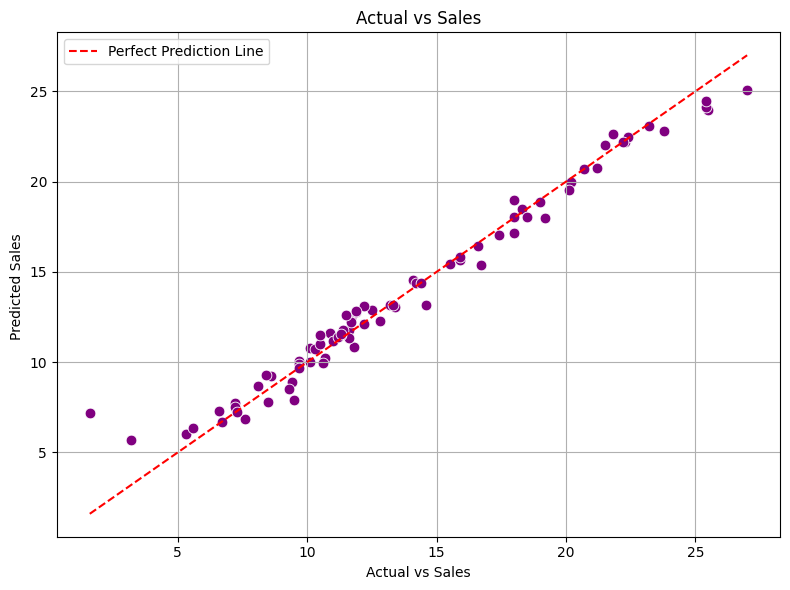

In [14]:
y_pred = rg.predict(x_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="purple", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel("Actual vs Sales")
plt.ylabel("Predicted Sales ")
plt.title("Actual vs Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### TV Spend vs Sales with Random Forest Prediction Line (Check The Model Performance with TV Spend or Sales)

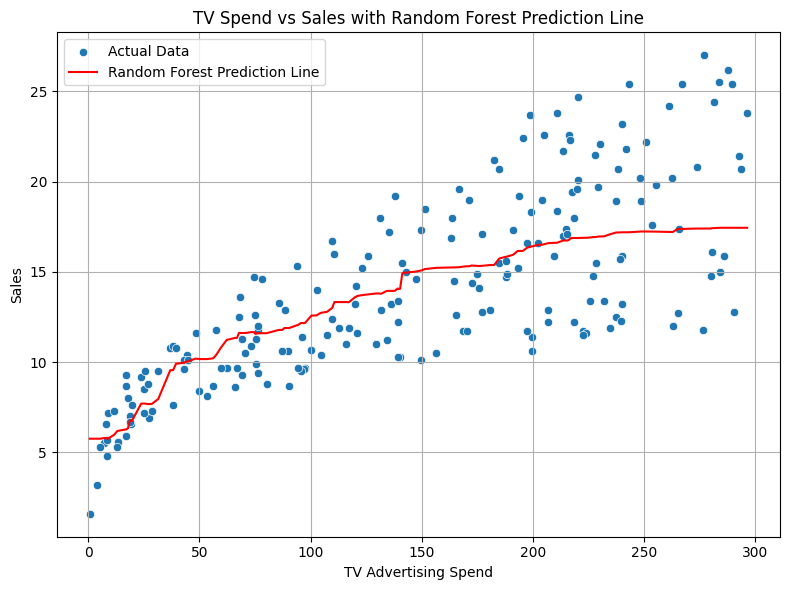

In [15]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Spend vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Radio vs Sales with Random Forest Prediction Line (Check The Model Performance with Radio vs Sales)

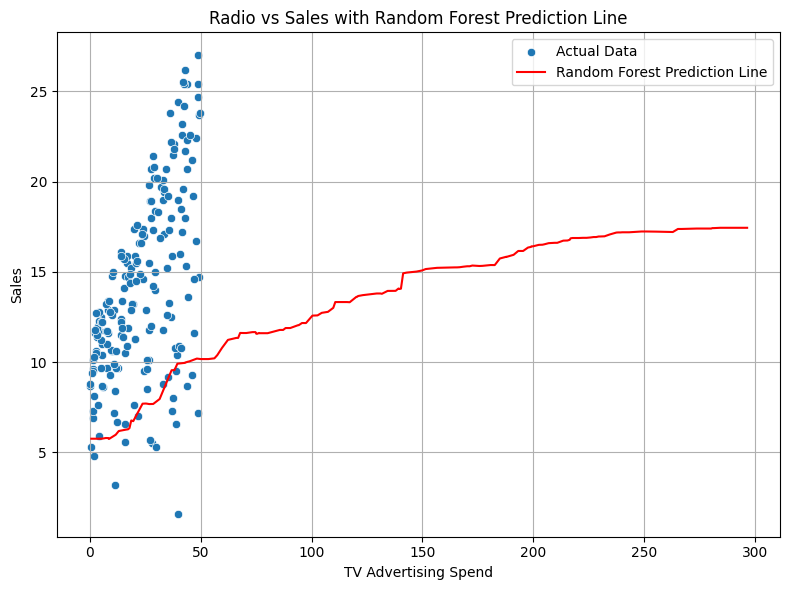

In [16]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio', y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Radio vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Newspaper vs Sales with Random Forest Prediction Line (Check The Model Performance with Newspaper vs Sales)

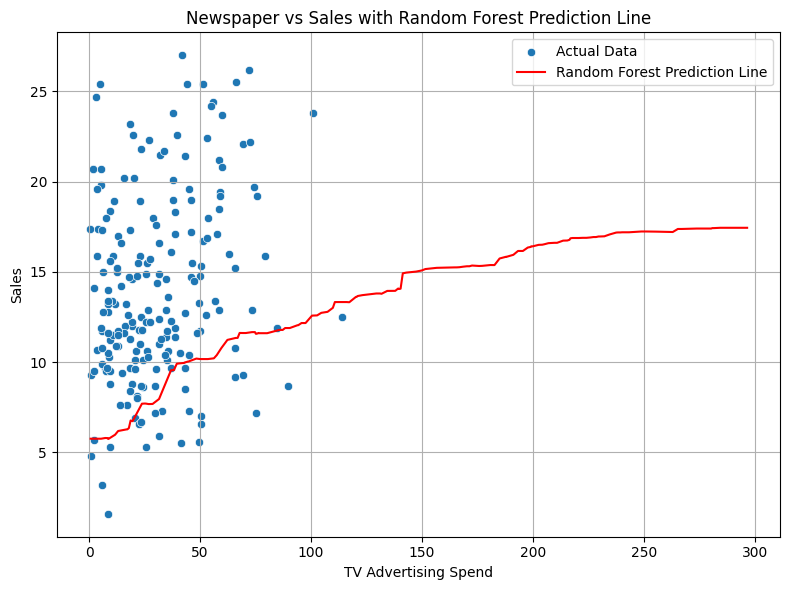

In [17]:
sorted_tv = np.sort(dataset['TV'].values)
radio_avg = dataset['Radio'].mean()
news_avg = dataset['Newspaper'].mean()

X_sorted = pd.DataFrame({
    'TV': sorted_tv,
    'Radio': radio_avg,
    'Newspaper': news_avg
})


sorted_predictions = rg.predict(X_sorted)


plt.figure(figsize=(8, 6))
sns.scatterplot(x="Newspaper", y='Sales', data=dataset, label='Actual Data')
plt.plot(sorted_tv, sorted_predictions, color='red', label='Random Forest Prediction Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales with Random Forest Prediction Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### TV vs Sales

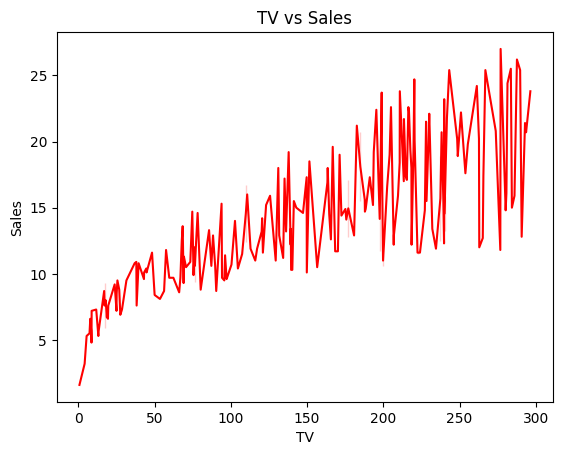

In [18]:
sns.lineplot(x="TV", y="Sales",data=dataset,color="r")
plt.title("TV vs Sales")
plt.show()


### Radio vs Sales

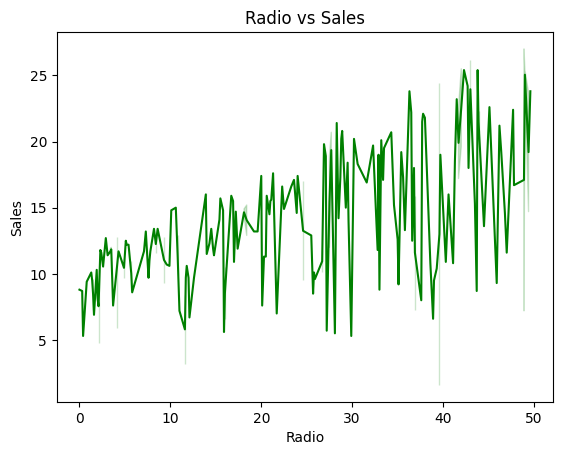

In [19]:
sns.lineplot(x="Radio", y="Sales",data=dataset,color="g")
plt.title("Radio vs Sales")
plt.show()


### Newspaper vs Sales

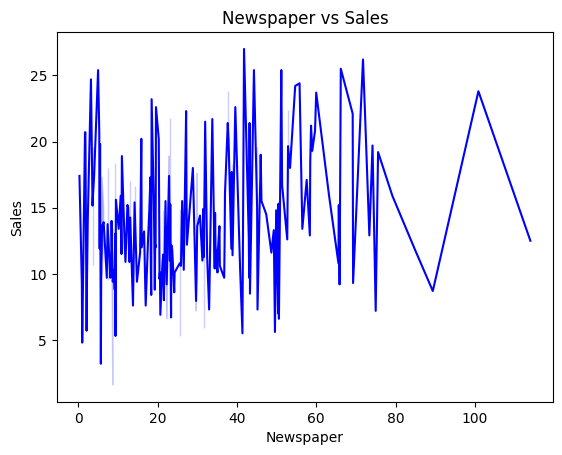

In [20]:
sns.lineplot(x="Newspaper", y="Sales",data=dataset,color="b")
plt.title("Newspaper vs Sales")
plt.show()


### Import on Sales

In [21]:
coefficients = pd.DataFrame(rg.feature_importances_, x.columns, columns=['Impact_on_Sales'])
coefficients.sort_values(by='Impact_on_Sales', ascending=False, inplace=True)
coefficients


,Impact_on_Sales
TV,0.607470
Radio,0.381076
Newspaper,0.011455


### Feature Importance - Impact of Advertising on Sales

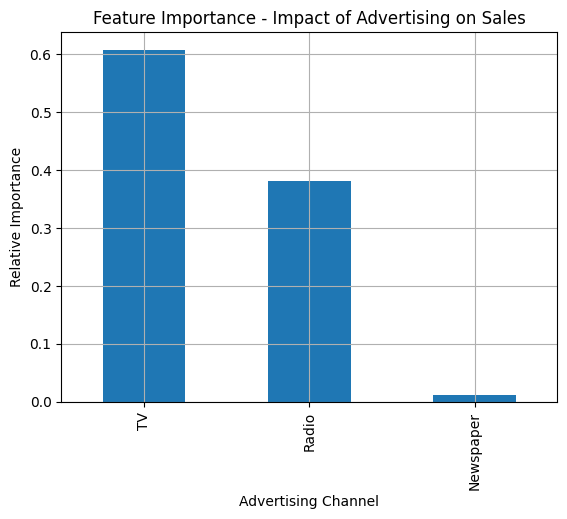

In [22]:
coefficients.plot(kind='bar', legend=False)
plt.title('Feature Importance - Impact of Advertising on Sales')
plt.ylabel('Relative Importance')
plt.xlabel('Advertising Channel')
plt.grid(True)
plt.show()


### Import Again library for check the Matrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check The Metrics 

In [31]:
mae = mean_absolute_error(dataset["Sales"], dataset["Prediction"]) 
mse = mean_squared_error(dataset["Sales"], dataset["Prediction"])
rmse = np.sqrt(mse)
r2 = r2_score(dataset["Sales"], dataset["Prediction"])


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.4004550000000004
Mean Squared Error (MSE): 0.4355686249999995
Root Mean Squared Error (RMSE): 0.6599762306325884
R² Score: 0.98391889737198


### 📌 Conclusion

In this project, we applied a **Random Forest Regressor** to predict product sales based on advertising budgets across TV, Radio, and Newspaper channels. The model demonstrated strong predictive power with an **R² Score of 0.98**, indicating that it captures the vast majority of the variance in sales data.

The evaluation metrics (MAE, MSE, RMSE) were low, confirming the model's accuracy and reliability in forecasting.

---

### 📊 Business Insights & Recommendations

- 📺 **TV advertising** shows the **strongest positive impact** on sales. It should remain a **primary budget focus**.
- 📻 **Radio advertising** contributes positively but with a smaller effect — consider **optimizing content or audience targeting**.
- 🗞️ **Newspaper advertising** has a **minimal effect** on sales, suggesting the need to **reassess or reallocate** spending in this area.
- ✅ The model is well-suited for **data-driven marketing strategies** and can help guide advertising budget decisions confidently.

---

### 📝 Recommendation

Increase investment in high-performing channels like **TV**, experiment with **targeting strategies for Radio**, and continuously monitor the **ROI of Newspaper campaigns**.

This project demonstrates how machine learning can power smarter business decisions by uncovering hidden patterns in marketing data.
